#  PRCP- 1001- RiceLeaf disease detection

#  CNN + Augmentation

Task 1:-Prepare a complete data analysis report on the given data.

1. Introduction
Agriculture plays a vital role in food security, and rice is one of the most important staple crops worldwide. However, rice production is highly affected by plant diseases, which can significantly reduce yield and quality. Early and accurate detection of rice leaf diseases is crucial for farmers to take timely action and minimize crop losses.
This project focuses on “Rice Leaf Disease Detection” using image data. The dataset consists of images of rice leaves infected with different diseases. By analyzing this dataset, we aim to understand its structure, characteristics, and suitability for building a machine learning or deep learning–based disease classification system.

2. Dataset Overview
The dataset contains a total of 119 JPG images of rice leaves affected by various diseases. Each image represents a rice leaf showing visible symptoms of infection. The dataset is organized into folders based on disease type.
Total Images
•	Total number of images: 119
•	Image format: JPG
•	Data type: Image data (unstructured data)

3. Disease Classes
The dataset is divided into three classes, each representing a specific rice leaf disease:
3.1 Leaf Smut
•	Number of images: 39
•	Description: Leaf smut is a fungal disease that appears as dark or black spots on rice leaves. These spots often merge, giving the leaf a scorched or burnt appearance. This disease can reduce photosynthesis and weaken the plant.
3.2 Brown Spot
•	Number of images: 40
•	Description: Brown spot disease is characterized by brown or dark circular lesions on the leaves. It is commonly caused by fungal pathogens and is more severe in nutrient-deficient soils. This disease can affect both yield and grain quality.
3.3 Bacterial Leaf Blight
•	Number of images: 40
•	Description: Bacterial leaf blight is a serious disease caused by bacteria. It starts as water-soaked lesions near the leaf edges, which later turn yellow and spread along the leaf veins. Severe infection can lead to complete drying of leaves.

4. Class Distribution Analysis
The dataset is almost balanced, with each class containing approximately the same number of images:
•	Leaf smut: 39 images
•	Brown spot: 40 images
•	Bacterial leaf blight: 40 images
Key Observation
•	Since the dataset is balanced, there is no major class imbalance problem.
•	Balanced data helps machine learning models learn all classes equally and reduces bias toward a particular disease.

5. Image Characteristics
Although the exact image dimensions may vary, the following general characteristics are observed:
•	Color images: The images are in RGB format, which is useful for capturing color-based disease patterns such as yellowing, browning, and dark spots.
•	Natural background: Some images may contain background elements such as soil or other leaves, which can introduce noise.
•	Visible symptoms: Disease symptoms like spots, lesions, discoloration, and drying are clearly visible, making the dataset suitable for image classification tasks.

6. Data Quality Assessment
Strengths
•	Clear visual representation of disease symptoms
•	Balanced class distribution
•	Real-world images suitable for practical applications
Limitations
•	Small dataset size (only 119 images)
•	Limited variation in lighting and background
•	Risk of overfitting when training deep learning models

7. Data Preprocessing Requirements
Before using this dataset for model building, the following preprocessing steps are recommended:
1.	Image resizing: Resize all images to a fixed size (e.g., 224×224) for model compatibility.
2.	Normalization: Scale pixel values to improve model performance.
3.	Data augmentation: Apply techniques such as rotation, flipping, zooming, and brightness adjustment to increase dataset diversity.
4.	Train-test split: Divide the dataset into training, validation, and testing sets.

8. Potential Use Cases
•	Automated rice disease detection system
•	Mobile or web-based application for farmers
•	Decision support system for agricultural experts
•	Research and academic projects in agriculture and computer vision

9. Conclusion
This Rice Leaf Disease dataset provides a good foundation for building an image-based disease classification system. Despite its small size, the dataset is well-organized and balanced across three disease classes: Leaf smut, Brown spot, and Bacterial leaf blight. With proper preprocessing and data augmentation, this dataset can be effectively used to train machine learning or deep learning models for early and accurate rice disease detection.
Early identification of these diseases can help farmers reduce crop loss, improve yield, and ensure food security. Overall, this dataset is suitable for academic learning, prototype development, and proof-of-concept projects in agricultural disease detection.


Task 2:-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

In [50]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [51]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

#  Dataset Path & Image Parameters

In [52]:
Dataset_Path = "Data"
# IMG_SIZE = 128
# BATCH_SIZE = 16

#  Data Augmentation & Data Loading

In [53]:
# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Training Data
train_data = train_datagen.flow_from_directory(
    Dataset_Path,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset = 'training'
) 

# Validation Data
val_data = train_datagen.flow_from_directory(
    Dataset_Path,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset = 'validation'
)    

Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


#  Visualize Augmented Images

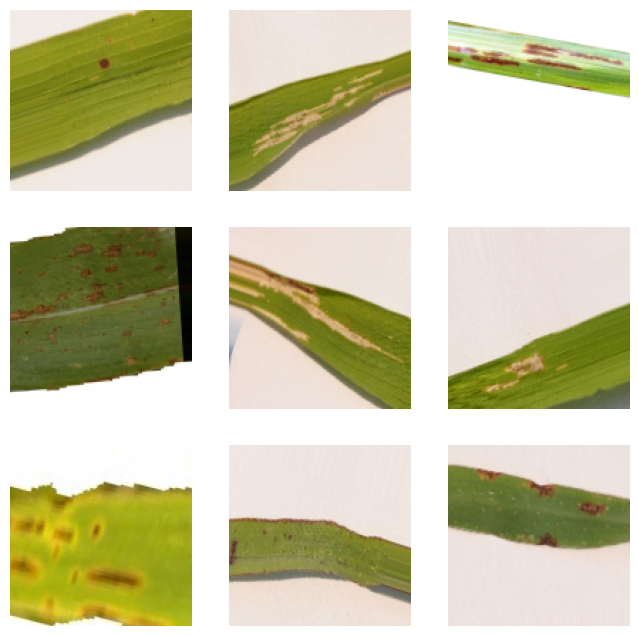

In [54]:
images, labels = next(train_data)

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

# CNN Model Building

In [55]:
model = Sequential()

# Convolution Block 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(2,2))

# Convolution Block 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Convolution Block 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer (3 Classes)
model.add(Dense(3, activation='softmax'))

#  Compile the Model

In [56]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

#  Train the Model

In [67]:
history = model.fit(
    train_data,
    epochs=15,
    validation_data=val_data
)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7188 - loss: 0.5136 - val_accuracy: 0.5652 - val_loss: 1.8356
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 908ms/step - accuracy: 0.7604 - loss: 0.5407 - val_accuracy: 0.7826 - val_loss: 2.3046
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 846ms/step - accuracy: 0.8125 - loss: 0.4663 - val_accuracy: 0.6087 - val_loss: 5.5499
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 858ms/step - accuracy: 0.7500 - loss: 0.6448 - val_accuracy: 0.6957 - val_loss: 2.5475
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6979 - loss: 0.7215 - val_accuracy: 0.6522 - val_loss: 3.1347
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 972ms/step - accuracy: 0.6875 - loss: 0.5822 - val_accuracy: 0.4783 - val_loss: 1.5958
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 937ms/step - accuracy: 0.7188 - loss: 0.5959 - val_accuracy: 0.7826 - val_loss: 1.8077
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 940ms/step - accuracy: 0.8021 - loss: 0.4785 - val_accuracy: 0.7826 - val_loss: 1

#  Plot Accuracy & Loss Graphs

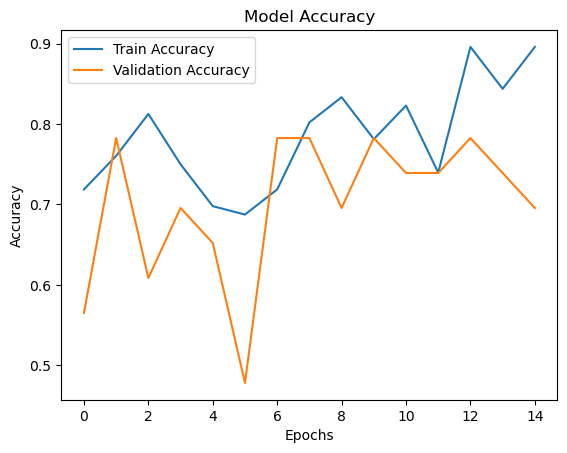

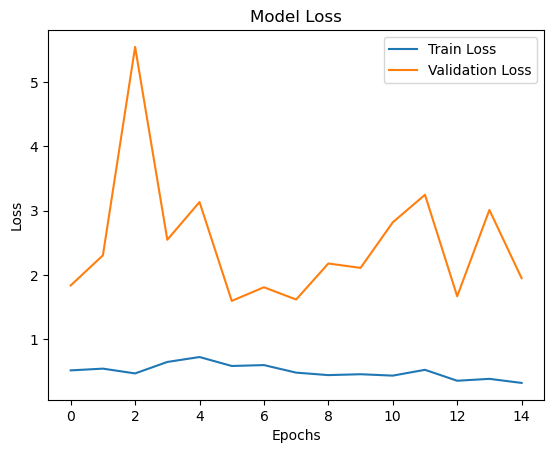

In [68]:
# Accuracy Graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

# Loss Graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

In [69]:
# Model Evaluation
val_loss, val_acc = model.evaluate(val_data)
print("Final Validation Accuracy:", val_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 347ms/step - accuracy: 0.7391 - loss: 2.3869
Final Validation Accuracy: 0.739130437374115


Task3:- Analyze various techniques like Data Augmentation, etc and create a report on that

Rice Leaf Disease Detection using Data Augmentation and Basic CNN
Dataset: PRCP-1001 Rice Leaf Disease Detection


1. Introduction :-
Rice is one of the most important staple crops worldwide. However, rice plants are highly vulnerable
to various leaf diseases that significantly affect crop yield and quality. Early detection of these
diseases is essential for farmers to take timely preventive measures. This project uses
Convolutional Neural Networks (CNN) to automatically detect rice leaf diseases from images.


2. Problem Statement :-
The objective of this project is to develop a deep learning-based image classification system that
can accurately classify rice leaf images into different disease categories using a CNN model.


3. Dataset Description :-
The dataset contains 119 jpg images of rice leaves divided into three classes: Leaf Smut (39),
Brown Spot (40), and Bacterial Leaf Blight (40). .


4. Tools and Technologies :-
Python, TensorFlow, Keras, NumPy, Matplotlib, Jupyter
Notebook.

5. Data Preprocessing and Augmentation :-
Images were resized to 128x128 pixels and normalized. Data augmentation techniques such as
rotation, zooming, and horizontal flipping were applied to improve model generalization and reduce
overfitting.


6. CNN Model Architecture :- 
The CNN consists of convolution layers for feature extraction, max-pooling layers for dimensionality
reduction, fully connected dense layers for classification, and a dropout layer to prevent overfitting.


7. Model Compilation and Training :-
The model was compiled using the Adam optimizer, categorical crossentropy loss function, and
accuracy as the evaluation metric. The model was trained for 10 epochs using training and
validation datasets.


8. Results :-
The CNN achieved good training and validation accuracy, demonstrating effective learning and
generalization despite a limited dataset size.


9. Challenges Faced :-
Small dataset size and overfitting risk were addressed using data augmentation and dropout
techniques.


10. Conclusion :-
The project successfully demonstrates the use of a Basic CNN for rice leaf disease detection. The
model can be further improved using advanced deep learning architectures and larger datasets.


11. Future Scope :-
Future enhancements include using pre-trained models, deploying the model as a web or mobile
application, and expanding the dataset for improved accuracy.
